# Wine Quality Preprocessing (Remove Outliers)

Made by: Anthony Kevin Oktavius

Library Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

Dataset Import

In [2]:
red_wine_dataset = pd.read_csv("winequality-red.csv", sep = ';')
red_wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
white_wine_dataset = pd.read_csv("winequality-white.csv", sep = ';')
white_wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Define All Fields

In [4]:
fixed_acidity_field = "fixed acidity"
volatile_acidity_field = "volatile acidity"
citric_acid_field = "citric acid"
residual_sugar_field = "residual sugar"
chlorides_field = "chlorides"
free_sulfur_dioxide_field = "free sulfur dioxide"
total_sulfur_dioxide_field = "total sulfur dioxide"
density_field = "density"
ph_field = "pH"
sulphates_field = "sulphates"
alcohol_field = "alcohol"
quality_field = "quality"

Define Categorical and Numerical Features

In [5]:
numerical_features = [fixed_acidity_field, volatile_acidity_field, citric_acid_field,
                      residual_sugar_field, chlorides_field, free_sulfur_dioxide_field,
                      total_sulfur_dioxide_field, density_field, ph_field, sulphates_field]
categorical_features = [quality_field]

Define Target And Label Fields

In [6]:
labels = numerical_features.copy()
target = categorical_features.copy()

In [7]:
x_white = white_wine_dataset[labels]
x_red = red_wine_dataset[labels]

y_white = white_wine_dataset[target]
y_red = red_wine_dataset[target]

## Pre Data Visualization



Before Applying Several Techniques, we can use data visualization to determine what our data distribution looks like.

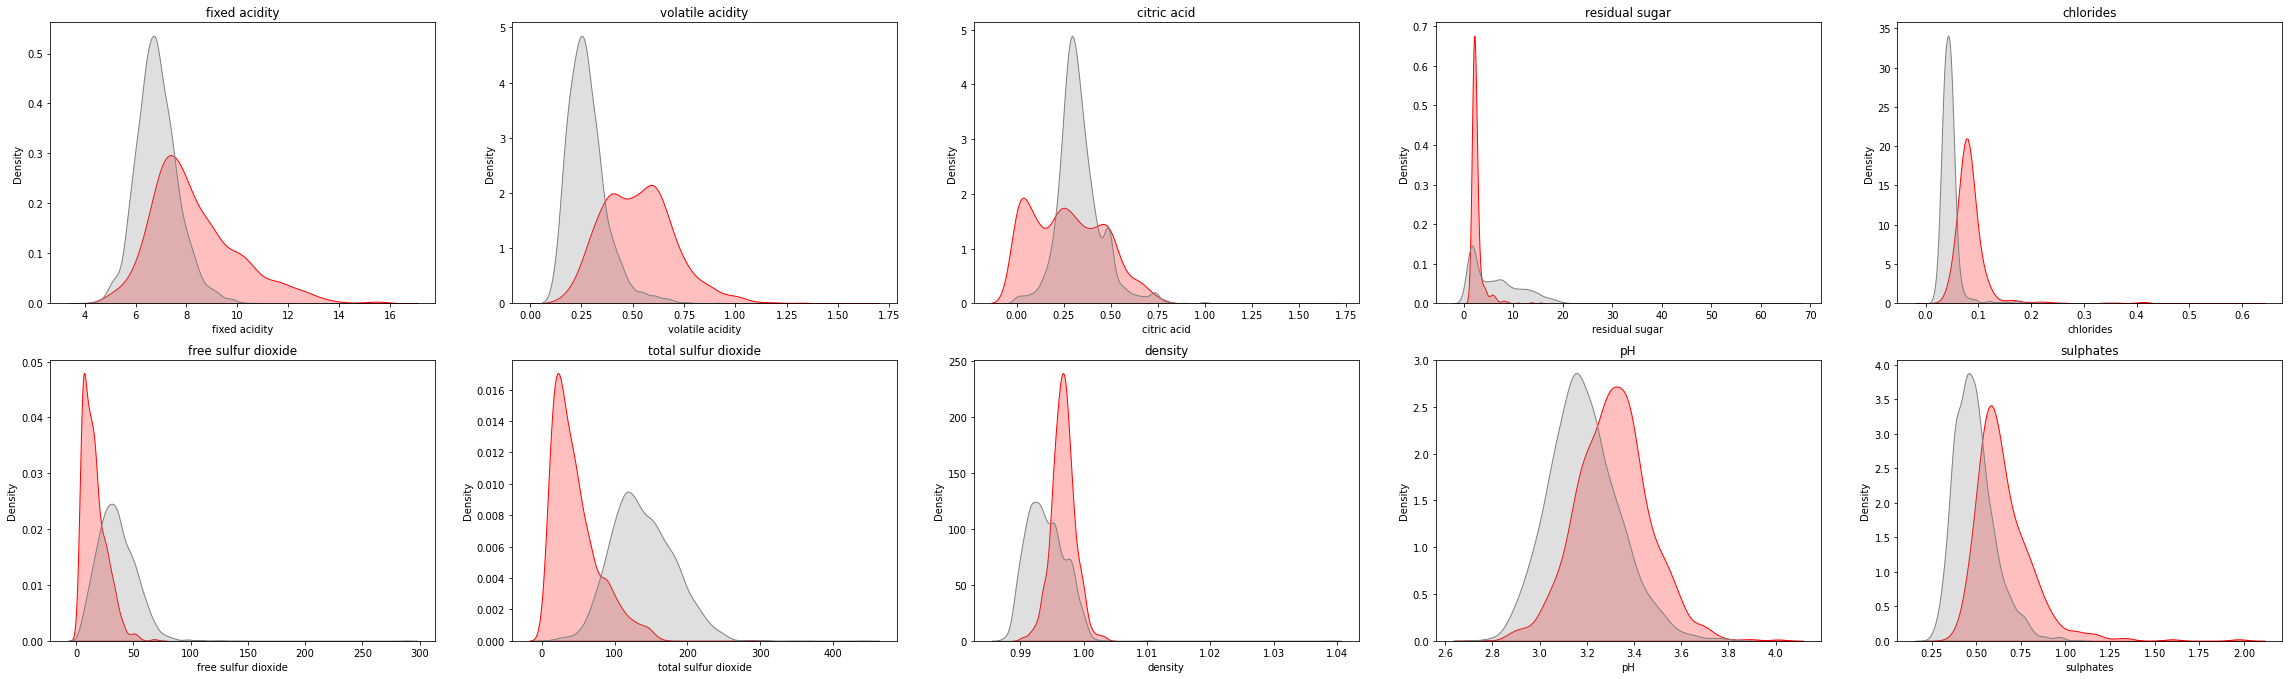

In [19]:
plt.figure(figsize=(40, 30))

for index, numerical_field in enumerate(numerical_features):
    plt.subplot(5, 5, index + 1)
    plt.title(numerical_field)
    sns.kdeplot(x = red_wine_dataset[numerical_field], shade=True, color = "r")
    sns.kdeplot(x = white_wine_dataset[numerical_field], shade=True, color = "gray")
plt.show()

## Remove Outliers

Based on the plot above, most of the data are skewed/ not a normal distribution.

In this section, I'm going to look at Wine Quality Removing Outlier Technique. In our case, we are going to look at automatic outlier detection.

Traditional outlier removal works best when we have a data with less number of features. We can easily configure outlier removal parameters to achieve the best result for our data. Some examples on traditional outlier removal are IQR Method and Z-Score.

When dealing with a large number of features, it's quite difficult to determine the best parameters for manual removal outlier technique. Furthermore, it's also quite difficult to visualize what data that has been removed by manual removal outlier technique, so it's harder for us to tune the manual outlier removal parameters. Which means, in this case, we're going to look at some of the automated algorithms for removing outliers.

Below are the methods that we are going to use.
* Isolation Forest
* One Class SVM
* Local Outlier Factor

Define Main Fields and Function

In [22]:
score_field = "Score"
value_field = "Value"
outlier_field = "Outlier"

In [23]:
# def get_data_outlier_model(df, model, x_feature, y_feature):
#     X = np.array([df[x_feature]]).reshape(-1, 1)
#     y = np.array(df[y_feature]).reshape(-1, 1)

#     model.fit(X, y)
#     predictions = model.predict(X)
#     scores = model.decision_function(X)
    
#     result_df = pd.DataFrame()
#     result_df[x_feature] = df[x_feature]
#     result_df[score_field] = scores
#     result_df[outlier_field] = predictions 

#     return result_df

def get_data_outlier_model_all_features(df, model, x_features, y_feature):
   
    X = df[x_features]
    y = df[y_feature]

    model.fit(X, y)
    predictions = model.predict(X)
    scores = model.decision_function(X)
    
    result_df = pd.DataFrame()
    result_df[x_features] = df[x_features]
    result_df[score_field] = scores
    result_df[outlier_field] = predictions 

    return result_df

Isolation Forest

In [24]:
isolation_forest_white_result_df = get_data_outlier_model_all_features(
    white_wine_dataset, 
    IsolationForest(random_state = 100),
    labels,
    target)

isolation_forest_red_result_df = get_data_outlier_model_all_features(
    red_wine_dataset, 
    IsolationForest(random_state = 100),
    labels,
    target)

One Class SVM

In [25]:
one_class_svm = OneClassSVM()

one_class_white_svm_result_df = get_data_outlier_model_all_features(
    white_wine_dataset, 
    one_class_svm,
    labels,
    target)

one_class_red_svm_result_df = get_data_outlier_model_all_features(
    red_wine_dataset, 
    one_class_svm,
    labels,
    target)

Local Outlier Factor

In [27]:
local_outlier_factor = LocalOutlierFactor(novelty = True)

local_outlier_factor_white_result_df = get_data_outlier_model_all_features(
    white_wine_dataset, 
    local_outlier_factor,
    labels,
    target)

local_outlier_factor_red_result_df = get_data_outlier_model_all_features(
    red_wine_dataset, 
    local_outlier_factor,
    labels,
    target)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Save All Outlier Removals Results

In [ ]:
outlier_removal_data = {
    "Isolation Forest": [isolation_forest_red_result_df, isolation_forest_white_result_df],
    "One Class SVM": [one_class_red_svm_result_df, one_class_white_svm_result_df],
    "Local Outlier Factor": [local_outlier_factor_red_result_df, local_outlier_factor_white_result_df],
}

## Post Data Visualization